# Computer Homework #9: Inductors in Circuits
## Due Thursday April 2 11:59pm

In this assignment we will examine the effect of inductors in circuits, and introduce the concept of alternating-current circuits. 

The canonical example of an inductor is a solenoid. When you run a current through a solenoid, it develops a magnetic field. If this current is changing, the magnetic field in the solenoid is changing too. And if that happens, the solenoid experiences a changing magnetic flux through itself. Faraday's law tells us that this will result in an emf in the solenoid that's in a direction to oppose the change in flux. 

The induced emf in the solenoid is proportional to the rate of change of the current, so we can write it as:
$$
    V_L = -L\frac{dI}{dt}.
$$
$L$ is a proportionality constant called the <b>inductance</b>. It's measured in Henries. 

Like capacitance, inductance is a geometrical quantity. We'll calculate it explicitly for a solenoid in class. Physically, inductors prevent currents from changing too quickly. If $dI/dt$ is large, the inductor will generate a large opposing emf that limits the current. Surge protectors are basically big inductors.

Inductors contribute to Kirchhoff's loop rule, just like resistors, capacitors, and batteries do. So we can solve circuits with inductors using techniques similar to what you did in [Computer Homework 5](https://github.com/Phys260WI2020/HW5/blob/master/HW_05.ipynb). You will want to have that assignment at hand when starting this one.  But, one primary difference is that we will use methods in a python `class` to perform the integration.

### Pre-flight:  In class, we will look at how a class might work for the RC circuit from homework 5.  You will need to create a modified class for this homework.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class RCCircuit() :
    '''Define a discharging RC Circuit, and use methods to perform the time integration'''
    def __init__(self, R = 10, C = 2e-06, V0_cap = 10, num_timesteps=1000, T=5) :
        ''' This initializes an RC Circuit object with given R, C, V_0 on the capaciotr,
        number of timesteps and period to integrate over'''
        self.Q0_cap = C * V0_cap
        self.R = R
        self.C = C
        self.RC = R * C
        self.T = T # Number of time constants to iterate over
        self.num_timesteps = num_timesteps
        
        self.energy_capacitor = 0.5 * C * V0_cap**2
        self.dt = T*self.RC/num_timesteps
        
        self.timesteps = np.arange(0, T*self.RC, self.dt)
        
        self.qarray = np.zeros(self.timesteps.shape)
        self.iarray = np.zeros(self.timesteps.shape)
        self.parray = np.zeros(self.timesteps.shape)
    
    def populate(self, inum, Q, I) :
        '''This populates the inum-th index of the three arrays that have been initialized
        depending on the present step, charge, and current'''
        self.qarray[inum] = Q
        self.iarray[inum] = I
        self.parray[inum] = (I**2)*self.R
        
    def update(self, Q, I) :
        '''This returns the next steps charge and current based on the current step charge and current.'''
        #Q = Q-I*self.dt  # dq = dq/dt * dt = I * dt
        #I = Q/self.RC
        deltaQ = I*self.dt
        Q -= deltaQ
        I = Q/self.RC
        return Q, I
    
    def solve_circuit(self) :
        '''Use update and populate to solve the circuit with a for loop'''
        Q = self.Q0_cap
        I = self.Q0_cap/self.RC

        for num_timestep in np.arange(self.num_timesteps):
            self.populate(num_timestep, Q, I)
            Q, I = self.update(Q, I)
            
    def calc_energy_dissipated(self) :
        '''Once the circuit is "solved", then we can calculate the energy dissipated'''
        return np.sum(self.parray*self.dt)


**Solve in two lines**: We create an instance of the class RCCircuit, and call it rcc.  Then, we solve the circuit with the method, rcc.solve_circuit()

In [13]:
rcc = RCCircuit(num_timesteps=100)
rcc.solve_circuit() 
print(rcc.calc_energy_dissipated())
print(rcc.energy_capacitor)

0.00010256050741884625
9.999999999999999e-05


**Plot using the attributes of the class:**  rcc.qarray, rcc.iarray, etc.

Text(0.5, 0, 'Time in units of RC')

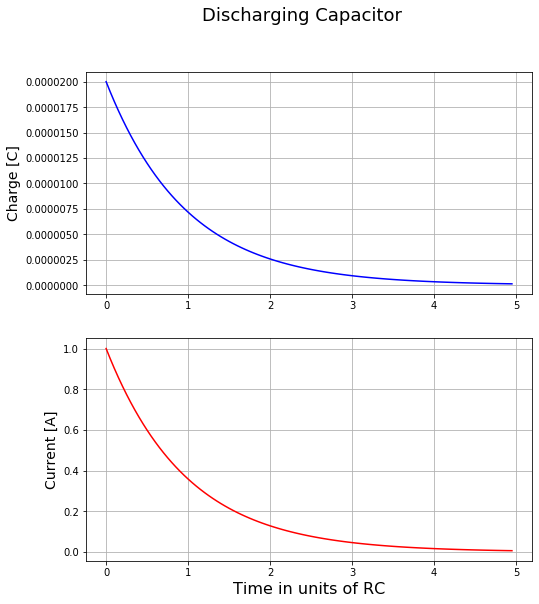

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,9))  
axes = [ax1, ax2]

fig.suptitle('Discharging Capacitor', fontsize=18)
yarrays = [rcc.qarray, rcc.iarray]
ylabels = ['Charge [C]', 'Current [A]']
colors = ['b', 'r']

for ax, yarray, ylabel, color in zip(axes, yarrays, ylabels, colors) :
    ax.plot(rcc.timesteps/rcc.RC, yarray, color=color)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=14)

ax2.set_xlabel('Time in units of RC', fontsize=16)


## Part 1 (10 points): A simple RL circuit

Consider this circuit:

<img src="http://www-personal.umich.edu/~gerdes/img/LR_DC.jpg">

At $t=0$ the switch is closed.

The loop rule for this circuit reads:
$$
        V - IR -L\frac{dI}{dt} = 0.
$$
This is a first-order differential equation similar to what we encountered earlier for $RC$ circuits. The solution is
$$
        I(t) = \frac{V}{R}\left(1 - e^{-t/\tau}\right),
$$
where 
$$
        \tau = \frac{L}{R}
$$
is the time constant for the circuit (analogous to $RC$ from before). To get the inductor voltage as a function of time, apply the definition from above:
$$
    V_L = -L\frac{dI}{dt} = {V}e^{-t/\tau}.
$$
So the current starts at zero and exponentially approaches its asymptotic value of $V/R$, while the inductor voltage starts out at $V$ and exponentially decays to zero as the current becomes steady.

Let:
* V = 10 Volts
* R = 1 $\Omega$
* L = 1 H

 

<b>Plot</b> the following quantities vs. time, in units of the time constant $\tau=L/R$:
* Voltage across the resistor and inductor 
* Power delivered to the resistor and inductor. Recall that $P = IV$. 

<b>Answer</b> the following questions:
* At what time (in units of $\tau$) is the maximum power being delivered to the inductor? 
* What is the total energy $U$ delivered to the inductor? 
* If you change $L$ while holding $R$ constant, how does $U$ change? 
* If you change $R$ while holding $L$ constant, how does $U$ change?
* If you simultaneously double $R$ and $L$, you get a circuit with the same time constant as before. Is this new circuit equivalent to your original one?

In [15]:
class RL_Circuit() :
    '''Define a circuit with a resistor and inductor'''
    def __init__(self, R = 1, L = 1, V0_batt = 10, num_timesteps=1000, T=5) :
        ''' initializes an LC Circuit object with given R, L, V0_batt on the battery,
        number of timesteps and period to integrate over'''
        self.V0_ind = V0_batt
        self.R = R
        self.L = L
        self.tow = L / R 
        self.V_batt = V0_batt
        
        # Set up the necessary time constants and arrays
        self.T = T # Number of time constants to iterate over
        self.num_timesteps = num_timesteps
        self.dt = T*self.tow/num_timesteps       
        self.timesteps = np.arange(0, T*self.tow, self.dt)
        
        self.vLarray = np.zeros(self.timesteps.shape)
        self.vRarray = np.zeros(self.timesteps.shape)
        self.iarray = np.zeros(self.timesteps.shape)
        self.pLarray = np.zeros(self.timesteps.shape)
        self.pRarray = np.zeros(self.timesteps.shape)
    
    def populate(self, inum, V_ind, I, V_res) :
        '''This populates the index of the three arrays'''
        self.vLarray[inum] = V_ind
        self.vRarray[inum] = V_res
        self.iarray[inum] = I
        self.pLarray[inum] = (I)*V_ind
        self.pRarray[inum] = (I)*V_res
        
    def update(self, V_ind, I, V_res) :
        '''This returns the next steps charge and current based on the current step charge and current.'''
        V_ind = self.V_batt - I*self.R
        V_res = I*self.R
        deltaI = ( (self.V_batt/self.L) - (I*self.R/self.L) ) * self.dt
        I += deltaI
        return V_ind, I, V_res
    
    def solve_circuit(self) :
        '''Use update and populate to solve the circuit with a for loop'''
        V_ind = self.V0_ind
        I = 0
        V_res = I*self.R

        for num_timestep in np.arange(self.num_timesteps):
            self.populate(num_timestep, V_ind, I, V_res)
            V_ind, I, V_res = self.update(V_ind, I, V_res)
            
    def calc_energy_stored(self) :
        '''Once the circuit is "solved", then we can calculate the energy dissipated'''
        return np.sum(self.pLarray*self.dt)
    

Total energy U delivered to the inductor:  49.45880318802439 J
Maximum power delivered to the inductor:  25.125577661854983 W
Time of maximum power:  0.6900000000000001 timesteps (tow)


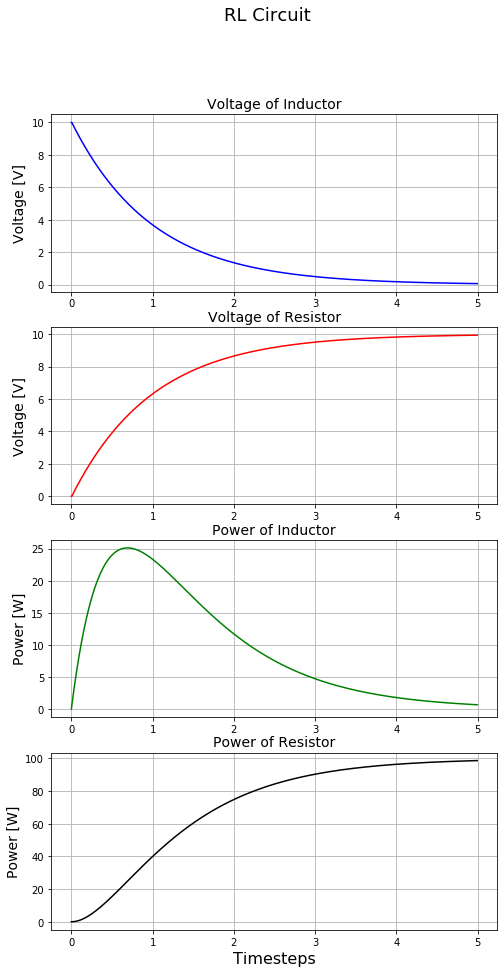

In [18]:
rlc1 = RL_Circuit(num_timesteps=1000)
rlc1.solve_circuit() 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,15))  
axes = [ax1, ax2, ax3, ax4]

fig.suptitle('RL Circuit', fontsize=18)
titles = ["Voltage of Inductor", "Voltage of Resistor", "Power of Inductor", "Power of Resistor"]
yarrays = [rlc1.vLarray, rlc1.vRarray, rlc1.pLarray, rlc1.pRarray]
ylabels = ['Voltage [V]', 'Voltage [V]','Power [W]', 'Power [W]']
colors = ['b', 'r', 'g', 'k']

for ax, yarray, ylabel, title, color in zip(axes, yarrays, ylabels, titles, colors) :
    ax.plot(rlc1.timesteps, yarray, color=color)
    ax.set_title(title, fontsize = 14)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=14)

ax4.set_xlabel('Timesteps', fontsize=16)

print("Total energy U delivered to the inductor: ", rlc1.calc_energy_stored(), "J")
print("Maximum power delivered to the inductor: ", np.amax(rlc1.pLarray), "W")
index_max_power = np.argmax(rlc1.pLarray)
print("Time of maximum power: ", rlc1.timesteps[index_max_power]/rlc1.tow, "timesteps (tau)")

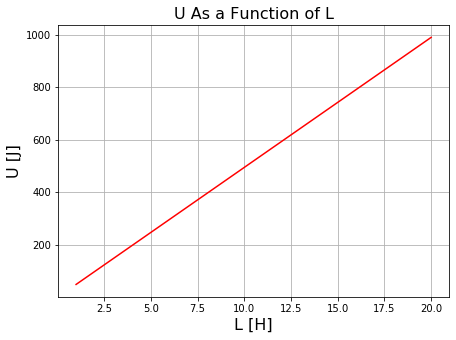

In [19]:
# What happens to U when you change L while holding R constant 
U_L = np.zeros([20])
change = np.arange(1,21)

for index, element in enumerate(change) :
    
    rlc_change = RL_Circuit(num_timesteps=1000, L = element)
    rlc_change.solve_circuit() 
    U_L[index] = rlc_change.calc_energy_stored()

plt.figure(figsize=(7,5))
plt.plot(change, U_L, 'r',)
plt.title("U As a Function of L", fontsize = 16)
plt.xlabel("L [H]", fontsize = 16)
plt.ylabel("U [J]", fontsize = 16)
plt.grid()
plt.show()

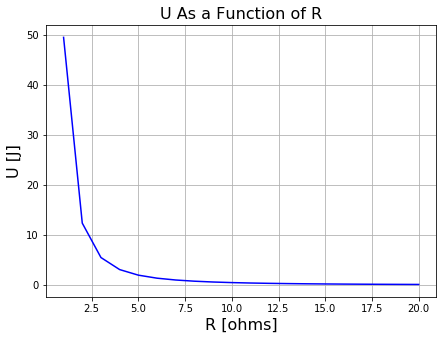

In [20]:
U_R = np.zeros([20])
change = np.arange(1,21)

for index, element in enumerate(change) :
    
    rlc_change = RL_Circuit(num_timesteps=1000, R = element)
    rlc_change.solve_circuit() 
    U_R[index] = rlc_change.calc_energy_stored()

plt.figure(figsize=(7,5))
plt.plot(change, U_R, 'b')
plt.title("U As a Function of R", fontsize = 16)
plt.xlabel("R [ohms]", fontsize = 16)
plt.ylabel("U [J]", fontsize = 16)
plt.grid()
plt.show()

Total energy U delivered to the inductor:  24.729401594012195 J
Maximum power delivered to the inductor:  12.562788830927492 W
Time of maximum power:  0.6900000000000001 timesteps (tau)


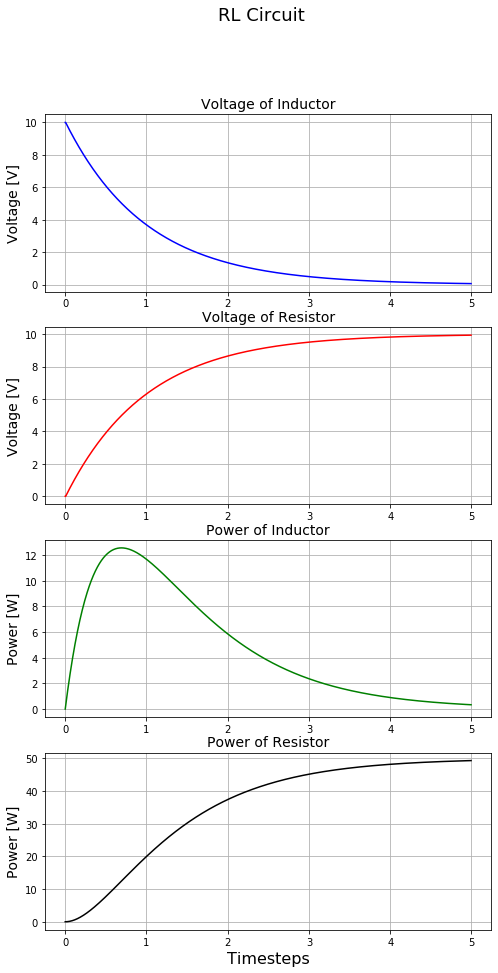

In [24]:
# If you double L and R is the new circuit equivalent?
rlc2 = RL_Circuit(num_timesteps=1000, L = 2, R = 2)
rlc2.solve_circuit() 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,15))  
axes = [ax1, ax2, ax3, ax4]

fig.suptitle('RL Circuit', fontsize=18)
titles = ["Voltage of Inductor", "Voltage of Resistor", "Power of Inductor", "Power of Resistor"]
yarrays = [rlc2.vLarray, rlc2.vRarray, rlc2.pLarray, rlc2.pRarray]
ylabels = ['Voltage [V]', 'Voltage [V]','Power [W]', 'Power [W]']
colors = ['b', 'r', 'g', 'k']

for ax, yarray, ylabel, title, color in zip(axes, yarrays, ylabels, titles, colors) :
    ax.plot(rlc2.timesteps, yarray, color=color)
    ax.set_title(title, fontsize = 14)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=14)

ax4.set_xlabel('Timesteps', fontsize=16)

print("Total energy U delivered to the inductor: ", rlc2.calc_energy_stored(), "J")
print("Maximum power delivered to the inductor: ", np.amax(rlc2.pLarray), "W")
index_max_power = np.argmax(rlc2.pLarray)
print("Time of maximum power: ", rlc2.timesteps[index_max_power]/rlc2.tow, "timesteps (tau)")



**If you change  𝐿  while holding  𝑅  constant, how does  𝑈  change?**

If you change L while holding R constant then U increases linearly with L.


**If you change  𝑅  while holding  𝐿  constant, how does  𝑈  change?**

If you change R while holding L constant then U will decrease inversely, so as R gets bigger U gets smaller. 



**If you simultaneously double  𝑅  and  𝐿 , you get a circuit with the same time constant as before. Is this new circuit equivalent to your original one?**

No, the peak amplitude of the power graphs are half that of the original circuit. However the voltage graphs look the same. Therefore it is not exactly equivalent. 

## Part 2 (10 points): Comparison to analytic solution:

* Use the analytic solution to this RL circuit to calulate when the peak power is delivered to the inductor.
* How much total energy is delivered to the inductor for the numbers given above?
* Determine how the total energy delivered to the inductor scales with $R$ and $L$. 

Does your program agree with your calculation?

Total energy U delivered to the inductor:  49.32659244226478 J
Maximum power delivered to the inductor:  24.999914335346784 W
Time of maximum power:  0.6950000000000001 timesteps (tow)


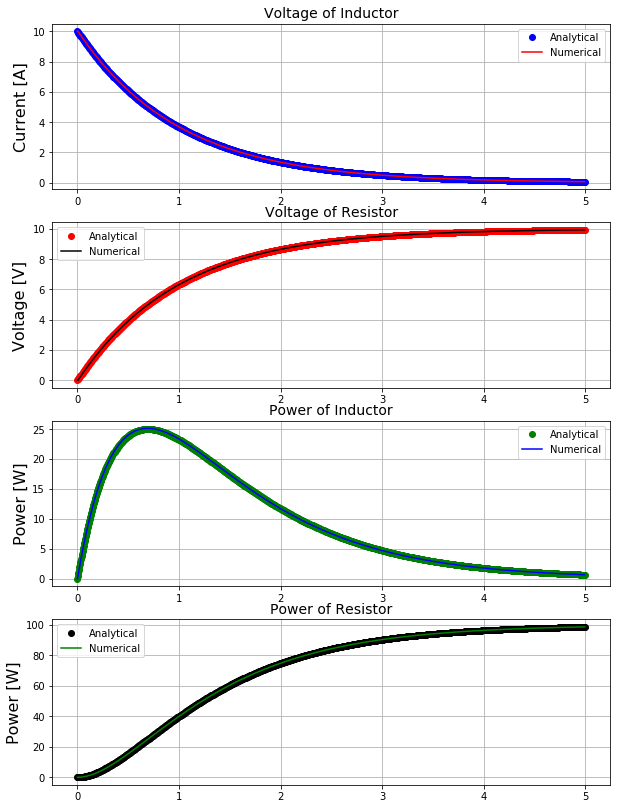

In [23]:
# Define analytical functions 
T = 5
L = 1
R = 1
V = 10

tow = L/R
num_timesteps = 1000
dt = T*tow/num_timesteps       
timesteps = np.arange(0, T*tow, dt)

# Calculate current array 
currentAnalytical = np.zeros(timesteps.shape)
for index, element in enumerate (timesteps) :
    currentAnalytical[index] = (V/R * (1-np.exp(-element/tow)))
    
# Calculate voltage of inductor array 
voltageInductorAnalytical = np.zeros(timesteps.shape)
for index, element in enumerate (timesteps) :
    voltageInductorAnalytical[index] = (V * (np.exp(-element/tow)))
    
# Calculate voltage of resistor array
voltageResistorAnalytical = currentAnalytical*R

# Calcualte power of inductor array
powerAnalytical1 = currentAnalytical * voltageInductorAnalytical

# Calcualte power of resistor array
powerAnalytical2 = currentAnalytical * voltageResistorAnalytical


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,14))  
axes = [ax1, ax2, ax3, ax4]


yarrays_anas = [voltageInductorAnalytical, voltageResistorAnalytical, powerAnalytical1, powerAnalytical2]
yarrays_nums = [rlc1.vLarray, rlc1.vRarray, rlc1.pLarray, rlc1.pRarray]
titles = ['Voltage of Inductor', 'Voltage of Resistor', 'Power of Inductor', 'Power of Resistor']
ylabels = ['Current [A]', 'Voltage [V]', 'Power [W]', 'Power [W]']
colors = ['b', 'r', 'g', 'k']
colors2 = ['r', 'k', 'b', 'g']

for ax, yarray_ana, yarray_num, title, ylabel, color, color2 in zip(axes, yarrays_anas, yarrays_nums, titles, ylabels, colors, colors2) :
    ax.plot(timesteps, yarray_ana, 'o', color=color, label = "Analytical")
    ax.plot(timesteps, yarray_num, color=color2, label = "Numerical")
    ax.grid()
    ax.legend()
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=16)

print("Total energy U delivered to the inductor: ", np.sum(powerAnalytical1*dt), "J")
print("Maximum power delivered to the inductor: ", np.amax(powerAnalytical1), "W")
index_max_power = np.argmax(powerAnalytical1)
print("Time of maximum power: ", timesteps[index_max_power]/tow, "timesteps (tau)")

(20,)


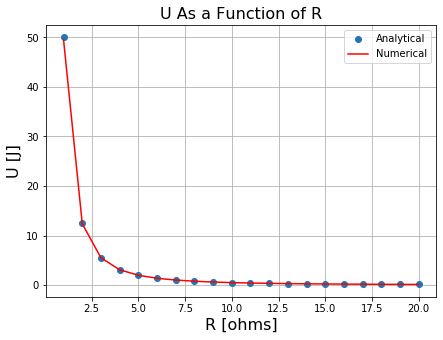

In [25]:
# Find how U scales with R
T = 5
num_timesteps = 1000
V0 = 10

U_ana_R = np.zeros([20])
change = np.arange(1,21)
print(change.shape)

currentAnalytical = np.zeros(timesteps.shape)
voltageAnalytical = np.zeros(timesteps.shape)

for index_change, element_change in enumerate (change) :
    for index_time, element_time in enumerate (timesteps) :
        
        tow = L/element_change
        dt = T*tow/num_timesteps 
        
        currentAnalytical[index] = (V/element_change * (1-np.exp(-element_change/tow)))
        voltageAnalytical[index] = (V * (np.exp(-element_change/tow)))
        powerAnalytical = currentAnalytical * voltageAnalytical
        
        U_element =  0.5 * L * (V0/element_change)**2
        U_ana_R[index_change] = U_element

        
plt.figure(figsize=(7,5))
plt.plot(change, U_ana_R, 'o', label = "Analytical")
plt.plot(change, U_R, 'r', label = "Numerical")
plt.title("U As a Function of R", fontsize = 16)
plt.xlabel("R [ohms]", fontsize = 16)
plt.ylabel("U [J]", fontsize = 16)
plt.legend()
plt.grid()
plt.show()

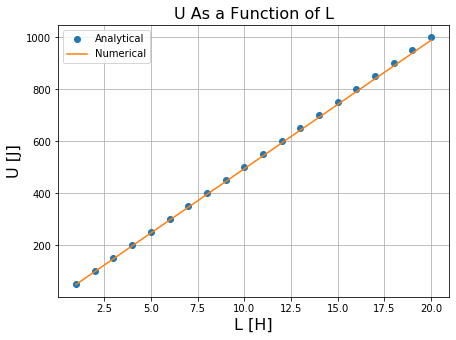

In [26]:
# Find how U scales with L

U_ana_L = np.zeros([20])
change = np.arange(1,21)

currentAnalytical = np.zeros(timesteps.shape)
voltageAnalytical = np.zeros(timesteps.shape)

for index_change, element_change in enumerate (change) :
    for index_time, element_time in enumerate (timesteps) :
        tow = element_change/R
        dt = T*tow/num_timesteps 
        
        currentAnalytical[index] = (V/R * (1-np.exp(-element_change/tow)))
        voltageAnalytical[index] = (V * (np.exp(-element_change/tow)))
        powerAnalytical = currentAnalytical * voltageAnalytical
        #print(np.sum(powerAnalytical))
        U_element = 0.5 * element_change * (V0/R)**2
        U_ana_L[index_change] = U_element
    

plt.figure(figsize=(7,5))
plt.plot(change, U_ana_L, 'o', label = "Analytical")
plt.plot(change, U_L, label = "Numerical")
plt.title("U As a Function of L", fontsize = 16)
plt.xlabel("L [H]", fontsize = 16)
plt.ylabel("U [J]", fontsize = 16)
plt.legend()
plt.grid()
plt.show()


**Use the analytic solution to this RL circuit to calulate when the peak power is delivered to the inductor.**
Peak Power: 24.999914335346784 W @ .695 tau timesteps

**How much total energy is delivered to the inductor for the numbers given above?**
Total Energy: 49.32659244226478 J

**Determine how the total energy delivered to the inductor scales with  𝑅  and  𝐿 .**
As a fucntion of R the total energy decreases inversely with R and linearly increases with L.

**Does your program agree with your calculation?**
Analytical solution agrees with numerical. 

## Part 3 (10 points): An alternating-current (AC) circuit

In Part 1, we considered a constant voltage source. But your code can easily accommodate a situation where the current is changing in time. Simply update $V$ at each time step along with the other values in the circuit. Let's replace the battery in Part 1 with a generator that produces a sinusoidal voltage,
$$
            V = V_0\sin\omega t.
$$

<img src="http://www-personal.umich.edu/~gerdes/img/LR_AC.jpg">

Now there are two different timescales in the problem: the characteristic time of the $RL$ circuit $\tau = L/R$, and the period of the generator, $2\pi/\omega$. In this part of the assignment, you'll hold $\tau$ fixed and investigate what happens as you change $\omega$.

Let 
* $V_0 = 10$ Volts
* $L = 1$ H
* $R = 1~\Omega$

<b>Make the following plots:</b>
* Let $\omega = R/L$, and plot $V_L$ and $V_R$ on the same time axis. Do they reach their peak values at the same time? If not, what is the phase difference between these two sinusoidal voltages?
* Allow $\omega$ to vary from $0.01/\tau$ to $100/\tau$ in equal logarithmic spacings (read the <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.logspace.html">numpy documentation</a> and use the function ```np.logspace()```), and make a log-log plot of $V_{L,\mathrm{peak}}/V_0$ vs. $\omega$. (This is known as a <i>Bode plot</i>.) Note: you will want to modify your timestep so that it's a small fraction of a generator period. Make sure to wait at least a few full generator cycles before evaluating $V_{L,\mathrm{peak}}$, to allow any transitory behavior due to initial conditions to be washed out. 


In [27]:
# Create a class to solve the circuit of an RL circuit with alternating current

class RL_Circuit_AC() :
    '''Define a circuit with a resistor and inductor'''
    def __init__(self, R = 1, L = 1, V0_batt = 10, num_timesteps=1000, T=100, omega = 1) :
        ''' This initializes an LC Circuit object with given R, L, V0_batt on the battery,
        number of timesteps and period to integrate over'''
        self.V0_ind = V0_batt
        self.R = R
        self.L = L
        self.tow = L / R 
        self.V0_batt = V0_batt
        self.V_batt = V0_batt
        self.omega = omega
        
        # Set up the necessary time constants and arrays
        self.T = T # Number of time constants to iterate over
        self.num_timesteps = num_timesteps
        self.dt = T*self.tow/num_timesteps       
        self.timesteps = np.arange(0, T*self.tow, self.dt)
        
        self.vLarray = np.zeros(self.timesteps.shape)
        self.iarray = np.zeros(self.timesteps.shape)
        self.parray = np.zeros(self.timesteps.shape)
        self.vBarray = np.zeros(self.timesteps.shape)
        self.vRarray = np.zeros(self.timesteps.shape)
    
    def populate(self, inum, V_ind, I, V_batt, V_res) :
        '''This populates the inum-th index of the three arrays that have been initialized
        depending on the present step, voltage, and current'''
        self.vLarray[inum] = V_ind
        self.iarray[inum] = I
        self.parray[inum] = (I)*V_ind
        self.vBarray[inum] = V_batt
        self.vRarray[inum] = V_res
        
    def update(self, time, V_ind, I, V_batt, V_res) :
        '''This returns the next steps charge and current based on the current step charge and current.'''       
        
        V_res = I*self.R
        deltaI = ( (V_batt/self.L) - (I*self.R/self.L) ) * self.dt
        I += deltaI
        V_batt = self.V0_batt * np.sin(self.omega*time)
        V_ind = V_batt - I*self.R
        
        return V_ind, I, V_batt, V_res
    
    def solve_circuit(self) :
        '''Use update and populate to solve the circuit with a for loop'''
        I = 0
        V_ind = self.V0_ind
        V_batt = self.V_batt
        V_res = I*self.R

        for num_timestep, time in enumerate (self.timesteps):           
            V_ind, I, V_batt, V_res = self.update(time, V_ind, I, V_batt, V_res)
            self.populate(num_timestep, V_ind, I, V_batt, V_res)
            
    def calc_energy_stored(self) :
        '''Once the circuit is "solved", then we can calculate the energy dissipated'''
        return np.sum(self.parray*self.dt)
 

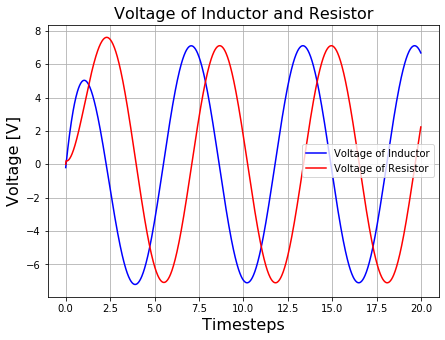

In [28]:
rlc_omega = RL_Circuit_AC(num_timesteps=1000, L = 1, R = 1, T = 20)
rlc_omega.solve_circuit() 

plt.figure(figsize=(7,5))
plt.plot(rlc_omega.timesteps, rlc_omega.vLarray, 'b', label = "Voltage of Inductor")
plt.plot(rlc_omega.timesteps, rlc_omega.vRarray, 'r', label = "Voltage of Resistor")
plt.title("Voltage of Inductor and Resistor", fontsize = 16)
plt.xlabel("Timesteps", fontsize = 16)
plt.ylabel("Voltage [V]", fontsize = 16)
plt.legend()
plt.grid()
plt.show()

**Let  𝜔=𝑅/𝐿 , and plot  𝑉𝐿  and  𝑉𝑅  on the same time axis. Do they reach their peak values at the same time? If not, what is the phase difference between these two sinusoidal voltages?**

It appears that they are offset by a fourth of a cycle or ninety degrees. This makes sense as the voltage of the inductor would peak first in an alternating circuit due to the di/dt term. 




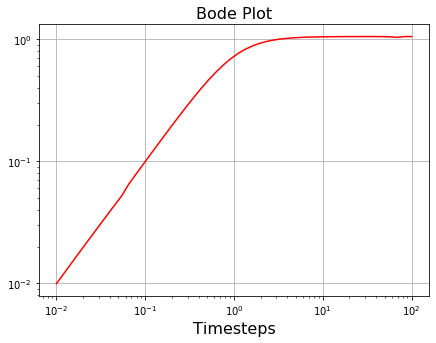

In [31]:
R = 1
L = 1
tow = L/R
V0 = 10

omega_array = np.logspace(-2, 2, endpoint=True, base=10.0, dtype=None)
VLpeakarray = np.zeros(omega_array.shape)
periodL = L/R
for index, element in enumerate (omega_array) :

    rlc_omega_changing = RL_Circuit_AC(num_timesteps=1000, L = 1, R = 1, omega = element)
    rlc_omega_changing.solve_circuit()
    
    periodAC = np.pi * 2 / element
    for index_time, element_time in enumerate (rlc_omega_changing.timesteps) :
        if((element_time > periodL) or (element_time > periodAC) ):
            start = index_time
            break
    sliceVLarray = rlc_omega_changing.vLarray[start:len(rlc_omega_changing.vLarray)-1]
    VL_peak = np.amax(sliceVLarray)
    VLpeakarray[index] = VL_peak/rlc_omega_changing.V0_batt

plt.figure(figsize=(7,5))
plt.loglog(omega_array, VLpeakarray, 'r')
plt.title("Bode Plot", fontsize = 16)
plt.xlabel("Timesteps", fontsize = 16)
plt.grid()
plt.show()  

## Part 4 (10 points): Discussion

* What happens when $\omega\ll 1/\tau$? When $\omega \gg 1/\tau$? When $\omega \approx 1/\tau$?
* Suppose that, instead of driving this circuit with a single frequency $\omega$, you gave it an input signal that consisted of a mixture of different frequencies -- for example, an electrical representation of a piece of music. What would the output of this circuit do to such a signal? Can you think of any applications for a circuit like this? 

In [33]:
voltage_1 = VLpeakarray[25]
print("Peak voltage when omega is about 1/tow: ", voltage_1)


Peak voltage when omega is about 1/tow:  0.7603818324879511


**What happens when  𝜔≪1/𝜏 ? When  𝜔≫1/𝜏 ? When  𝜔≈1/𝜏 ?**

When $\omega\ll 1/\tau$ the peak voltage across the inductor increases linearly. When $\omega \gg 1/\tau$ the peak voltage across the inductor quickly approaches an asymtotic value of about 1. When $\omega \approx 1/\tau$ the value of the peak voltage across the inductor is about 0.76038. This is close to the $ \frac{1}{\sqrt{2}}$. When $\omega \approx 1/\tau$ this region of the graph can be viewed as a period where the peak voltage across the inductor goes from increasing linearly to rapidly becoming an asymtotic value of about 1.



**What would the output of this circuit do to such a signal? Can you think of any applications for a circuit like this?** For the RL circuit it would absorb high frequency signals and lets past lower frequency signals, kind of like a filter. This could be used in frequency modulation of waves and letting past certain frequency waves (lower).